In [22]:
import cv2
from keras.utils import np_utils
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [24]:
image_gen.flow_from_directory('./CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [28]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('./CATS_DOGS/train', 
                              target_size=(64, 64, 3)[:2],
                              batch_size = batch_size, 
                              class_mode='binary')
test_image_gen = image_gen.flow_from_directory('./CATS_DOGS/test', 
                              target_size=(64, 64, 3)[:2],
                              batch_size = batch_size, 
                              class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [29]:
results = model.fit_generator(train_image_gen, epochs=200, steps_per_epoch=250, validation_data=test_image_gen, validation_steps=25)

Epoch 1/200


C:\Users\nia1ct\AppData\Local\Temp\ipykernel_24368\405427025.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=200, steps_per_epoch=250, validation_data=test_image_gen, validation_steps=25)


250/250 [==============================] - 31s 119ms/step - loss: 0.6935 - accuracy: 0.5188 - val_loss: 0.6911 - val_accuracy: 0.5450
Epoch 2/200
250/250 [==============================] - 28s 112ms/step - loss: 0.6880 - accuracy: 0.5270 - val_loss: 0.6794 - val_accuracy: 0.5450
Epoch 3/200
250/250 [==============================] - 28s 112ms/step - loss: 0.6872 - accuracy: 0.5345 - val_loss: 0.6875 - val_accuracy: 0.5250
Epoch 4/200
250/250 [==============================] - 27s 108ms/step - loss: 0.6837 - accuracy: 0.5530 - val_loss: 0.6918 - val_accuracy: 0.5600
Epoch 5/200
250/250 [==============================] - 27s 109ms/step - loss: 0.6767 - accuracy: 0.5782 - val_loss: 0.6615 - val_accuracy: 0.5725
Epoch 6/200
250/250 [==============================] - 27s 109ms/step - loss: 0.6645 - accuracy: 0.5957 - val_loss: 0.6561 - val_accuracy: 0.6425
Epoch 7/200
250/250 [==============================] - 27s 110ms/step - loss: 0.6636 - accuracy: 0.5983 - val_loss: 0.6470 - val_accurac

In [30]:
results.history['accuracy']

[0.518750011920929,
 0.5270000100135803,
 0.534500002861023,
 0.5529999732971191,
 0.578249990940094,
 0.5957499742507935,
 0.5983462929725647,
 0.625,
 0.6412500143051147,
 0.6489999890327454,
 0.6787499785423279,
 0.6912500262260437,
 0.6980000138282776,
 0.7003257274627686,
 0.7099999785423279,
 0.7107499837875366,
 0.7245000004768372,
 0.7225000262260437,
 0.7210000157356262,
 0.7416687607765198,
 0.7287499904632568,
 0.7300000190734863,
 0.7444249391555786,
 0.7415000200271606,
 0.7496867775917053,
 0.7607116103172302,
 0.7509999871253967,
 0.7567499876022339,
 0.769481360912323,
 0.7622500061988831,
 0.7769982218742371,
 0.7565000057220459,
 0.7704836130142212,
 0.7679779529571533,
 0.7592499852180481,
 0.7632499933242798,
 0.778249979019165,
 0.781000018119812,
 0.7902500033378601,
 0.7664745450019836,
 0.7802555561065674,
 0.7835128903388977,
 0.7799999713897705,
 0.7792500257492065,
 0.7870000004768372,
 0.7945377230644226,
 0.7862499952316284,
 0.7894999980926514,
 0.78974997

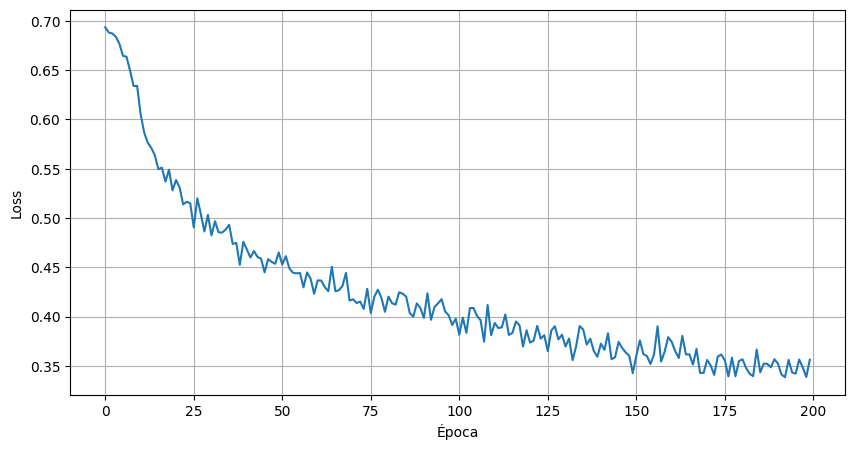

In [36]:
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Época')
plt.grid()
plt.savefig('loss.png')

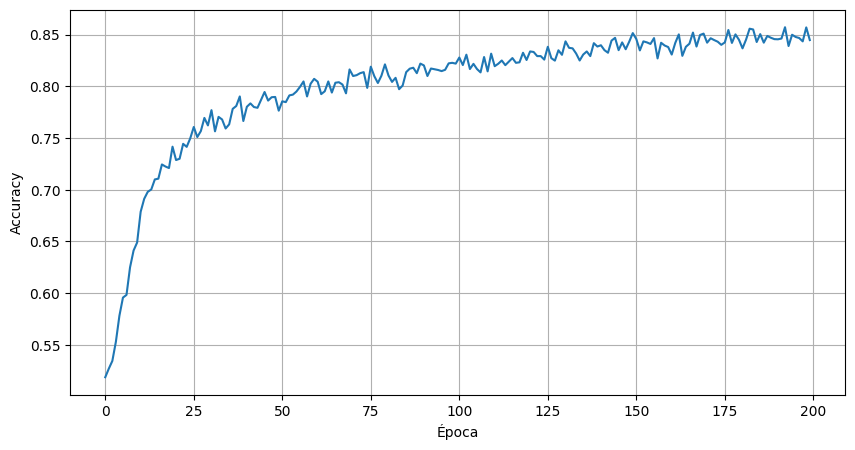

In [32]:
plt.figure(figsize=(10,5))
plt.plot(results.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.grid()
plt.savefig('accuracy.png')

In [33]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [53]:

import numpy as np
from tensorflow.keras.preprocessing import image

#dog_file = './CATS_DOGS/train/DOG/4.jpg'
dog_file = './ImagemTeste/cachorro.jpg'

dog_img = image.load_img(dog_file, target_size=(64, 64))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 33ms/step


In [54]:
print(f'A probabilidade de ser um cachorro é de: {prediction_prob*100}%')

A probabilidade de ser um cachorro é de: [[71.92494]]%
